In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import math
from collections import Counter
from sklearn import datasets
import random
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap

# Practice 2 - Kmeans

### 1) Data visualization

#### a) Load the database (Customers_practice.csv).

In [2]:
Customer_data = pd.read_csv('Customers_practice.csv')

#### b) Print the 10 first rows (with head function) of the dataset. Determine the size of the examples and the number of features of the problem.


In [3]:
Customer_data.head(10)

,Annual_Income_(k$),Spending_Score
0,103,85
1,60,52
2,59,55
3,62,55
4,48,47
5,44,50
6,73,5
7,33,92
8,71,75
9,21,66


In [4]:
Customer_data.shape # 2 features with a size of 170

(170, 2)

#### c) Display a scatter plot of the data. You should obtain the following expected result :

<AxesSubplot: xlabel='Annual_Income_(k$)', ylabel='Spending_Score'>

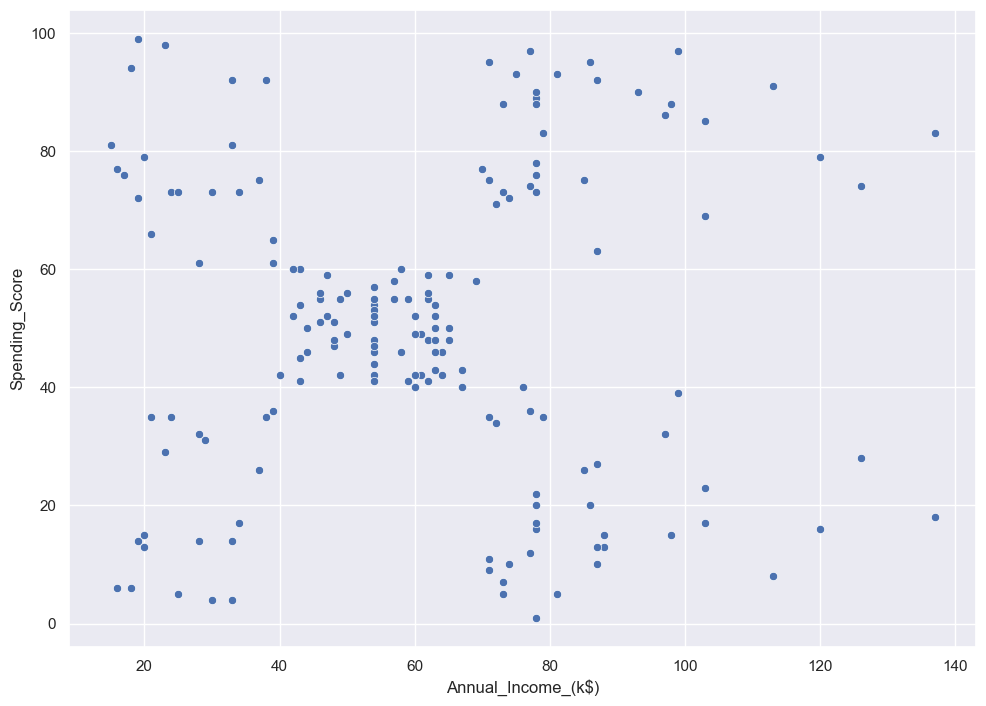

In [5]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=Customer_data, x="Annual_Income_(k$)",
y="Spending_Score")

### 2) K-means algorithm

In [6]:
Customer_data_arr = Customer_data.values
Customer_data_arr[:5]

array([[103,  85],
       [ 60,  52],
       [ 59,  55],
       [ 62,  55],
       [ 48,  47]])

In [7]:
def euclidian_distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))


In [8]:
def euclidian_distance2(v1,v2):
    return np.sum((v1-v2)**2)

In [9]:
class Kmeans:
    
    def __init__(self, k, X):     # Storing value inside the class so we can reuse them in the functions
        self.k = k  
        self.nb_it = 100         # 100 iteration max
        self.nb_samples, self.nb_features = X.shape
        self.X = X
        self.X_array = np.array(X)
    
    def init_centroids(self, X):    
        Centroids = random.sample(list(X), self.k)          # Initialisation by choosing k random centroid from X (data set)
        return np.array(Centroids)
               
    def cluster_calc(self, X, Centroids):
        clusters = [ [] for i in range(self.k)]          # Creation of k number of Clusters. First we create k empty array inside a list 
        for i,X in enumerate(X):                         # Now for each of these cluster we will put indexes of X
            closest_centroid = np.argmin([[euclidian_distance(X,cent)] for j, cent in enumerate(Centroids)])  # comprehension list calculating the dist between each centroid and X point. and then getting the index of the smallest one
            clusters[closest_centroid].append(i)                              # appending the index i of X inside the corresponding class cluster
        return np.array(clusters)
  
    def create_new_centroid(self, clusters, X):          
        Centroids = np.zeros((self.k, self.nb_features))           # populating new centroids with 0
        for i, clust in enumerate(clusters):                       
            new_centroid = np.mean(X[clust], axis=0)              # getting the mean of each X from the clusters
            Centroids[i] = new_centroid
        return Centroids

    def predict(self, X, plot = False):                      # argument plot is used to activate or not the plot function inside
        Centroids_init = self.init_centroids(X)              # creating the first centroids
        res = "Initialisation" + '\n'  
        count = 0                                            # creating a count value that will help us control the while loop
        centroid_list = []                                   # centroid list that will be use to compare centroids for convergence or not
        _class = np.zeros((self.nb_samples,))                # Empy array that will be populated with X classes in order to plot them
        converged = False                                    # boolen that will help us control the loop
        
        while count < self.nb_it and not converged:
            if count == 0:                                   # First step in the loop, initation, appending centroid, calculating first cluster
                centroid_list.append(Centroids_init)
                cluster = self.cluster_calc(X, Centroids_init)
                Centroids_looped = Centroids_init 
                count += 1                                   # + 1 count for the first itteration
            else:
                Centroids_looped = self.create_new_centroid(cluster, X)          # after the first step, this will loop unless 2 elments from the centroid list are not different
                cluster = self.cluster_calc(X, Centroids_looped)
                centroid_list.append(Centroids_looped)
                count += 1
                if np.array_equal((centroid_list[count-1]),(centroid_list[count-2])) == True:
                    converged = True                                              # after some iteration, 2 centroids are equals and so converged, we are passing true to the boolean
                    for i, x in enumerate(cluster):                               # creation of the class list with the final cluster
                        _class[x] = round(i)
                    if plot == True:                                              # fonction plot will be call if desired
                        self.plot_fig(X, _class, centroid_list[-1])
                else:
                    pass

            
            # print(str('Epoch: {0} | new centroids: {1} '.format(count, Centroids_looped))+ '\n')
        
        return Centroids_looped, cluster

    def plot_fig(self, X, y, Centroids):                                             # plot foncction thta display in a dynamic way, Clusters with they class and centroids
        Data = pd.DataFrame(X, columns=["Annual_Income_(k$)", "Spending_Score"])
        Y = pd.DataFrame(y, columns=["Class"])
        Result = pd.concat([Data, Y], axis=1)                                        # Concatenating X data set and the class list
        Centroid = pd.DataFrame(Centroids, columns=["Annual_Income_(k$)", "Spending_Score"])
        Class = pd.DataFrame(list(range(0,len(Centroids))) , columns=["ClassCentoid"])
        Result2 = pd.concat([Centroid, Class], axis=1)                               # Concatenating the Centroid list with an array created with class
        sns.set(rc={'figure.figsize':(11.7,8.27)})
        ax = sns.scatterplot(data=Result, x="Annual_Income_(k$)", y="Spending_Score", hue="Class", palette="bright")      # Clusters display
        ax = sns.scatterplot(data=Result2, x="Annual_Income_(k$)", y="Spending_Score", hue="ClassCentoid", palette="dark", s=100, legend=False)   # Centroid display
        return plt.show()
    

# does not work
    def SSD(X):
        self.k_ssd = self.nb_samples/2
        ssd_dist = 0
        SSD = []
        for i in range(slef.k_ssd):
            self.Kmeans(i, X)
            Centroids, Clusters = self.predict(X)
            for i, x in enumerate(Clusters):
                ssd_dist += euclidian_distance(X[x], Centroids[i])
            SSD.append(ssd_dist)   
        fig, ax = plt.subplots(figsize=(20,10))
        ax.set_xlabel('# of Nearest Neighbors (k)')
        ax.set_ylabel('Accuracy (%)');
        
        return ax.plot(range(1,self.k_ssd), SSD)
               

#### a) Test the kmeans algorithm with k=3, with random_state=0. Use the fit() function on your dataset. Because there is no target column, you can use all of the Data to train your model.



In [10]:
clf = Kmeans(6, Customer_data)
# for the initialisation of the class Kmeans a Pandas Data frame need to be
# inputed. After that the an array will be used for all the fonctions

#### b) Once the model is trained, you can access to the labels assigned to Data by kmeans using labels_ attribute (look for the documentation to see an example of usage). Display the distinct classes assigned by kmeans (use np.unique())



In [11]:
clf_centroid = clf.init_centroids(Customer_data_arr)
clf_cluster = clf.cluster_calc(Customer_data_arr, clf_centroid)
clf_cluster 
# Each list below correspond to a Cluster/Class, 3 here. 
# And inside these 3 list are all the corresponding Customer_data indexes

/var/folders/g2/pf8chq_93fv3k45nyqlc096r0000gn/T/ipykernel_43553/70118912.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(clusters)


array([list([19, 29, 31, 33, 43, 44, 54, 58, 72, 83, 84, 89, 100, 119, 130, 132, 139]),
       list([6, 17, 66, 70, 76, 101, 148]),
       list([1, 2, 3, 4, 5, 9, 10, 11, 13, 15, 16, 18, 20, 24, 25, 26, 30, 32, 35, 36, 37, 40, 42, 47, 48, 49, 50, 52, 53, 57, 60, 61, 63, 64, 67, 68, 71, 73, 74, 75, 79, 80, 82, 85, 86, 87, 91, 93, 94, 95, 97, 99, 102, 106, 109, 110, 113, 117, 120, 121, 123, 125, 127, 129, 134, 136, 137, 141, 146, 154, 155, 156, 157, 159, 160, 163, 165, 167, 169]),
       list([62, 69, 77, 78, 108, 122, 131, 135, 143, 144, 147]),
       list([0, 7, 8, 12, 14, 21, 23, 27, 28, 34, 38, 45, 51, 55, 81, 88, 90, 92, 96, 98, 104, 105, 111, 112, 114, 116, 118, 124, 126, 128, 133, 138, 142, 149, 151, 152, 158, 161, 162, 164, 166]),
       list([22, 39, 41, 46, 56, 59, 65, 103, 107, 115, 140, 145, 150, 153, 168])],
      dtype=object)

#### c) You can access to the centroids of the clusters using the cluster_centers_ attribute (look for the documentation to see an example of usage). Print them.


In [12]:
clf_centroid # These are the 3 randomly created Centroids just before
             # the creation of the Cluster

array([[20, 15],
       [71, 11],
       [54, 46],
       [78, 20],
       [73, 73],
       [88, 13]])

#### d) Plot the scatter plot using the labels assigned by kmeans algorithm. This time plot the points according to the label. You should obtain the following plot :


/var/folders/g2/pf8chq_93fv3k45nyqlc096r0000gn/T/ipykernel_43553/70118912.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(clusters)


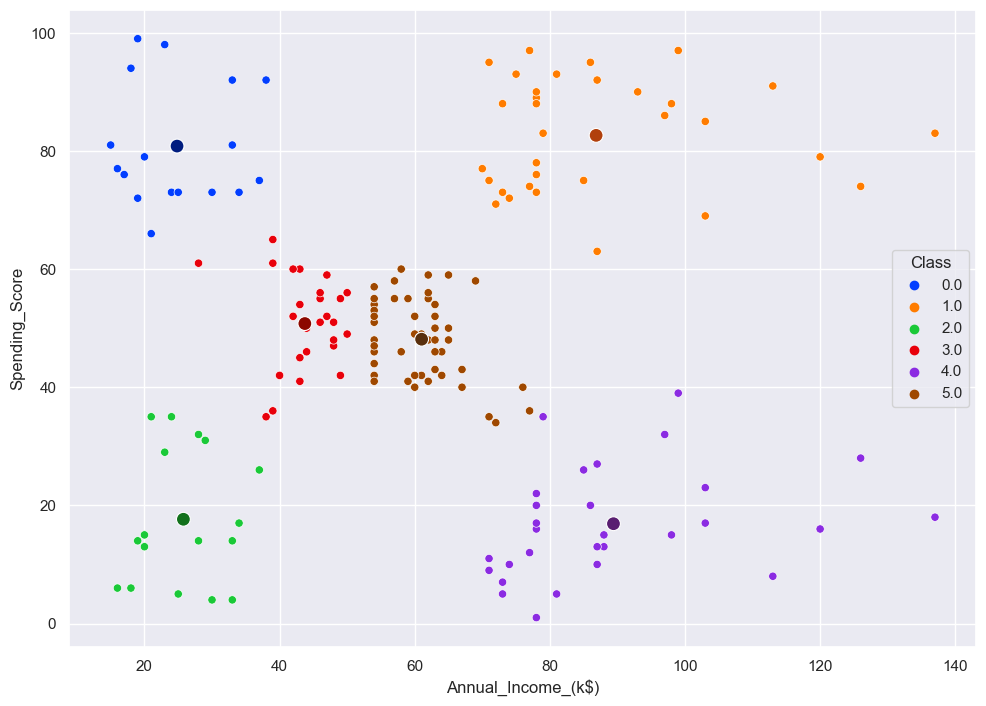

(array([[24.82352941, 80.82352941],
        [86.84848485, 82.63636364],
        [25.76470588, 17.64705882],
        [43.74074074, 50.77777778],
        [89.4137931 , 16.89655172],
        [61.0212766 , 48.12765957]]),
 array([list([7, 9, 25, 60, 67, 81, 87, 102, 109, 118, 121, 142, 149, 159, 164, 165, 167]),
        list([0, 8, 12, 14, 21, 23, 27, 28, 34, 38, 45, 51, 88, 92, 96, 98, 104, 105, 111, 112, 114, 116, 124, 126, 128, 133, 138, 151, 152, 158, 161, 162, 166]),
        list([19, 29, 31, 33, 43, 44, 54, 58, 72, 83, 84, 89, 100, 119, 130, 132, 139]),
        list([4, 5, 11, 13, 15, 20, 26, 32, 35, 37, 48, 50, 61, 63, 85, 94, 106, 110, 120, 129, 134, 136, 146, 154, 157, 163, 169]),
        list([6, 17, 22, 39, 41, 46, 56, 59, 62, 65, 66, 69, 70, 76, 77, 78, 101, 103, 107, 108, 115, 140, 144, 145, 147, 148, 150, 153, 168]),
        list([1, 2, 3, 10, 16, 18, 24, 30, 36, 40, 42, 47, 49, 52, 53, 55, 57, 64, 68, 71, 73, 74, 75, 79, 80, 82, 86, 90, 91, 93, 95, 97, 99, 113, 117, 122, 123

In [13]:
clf.predict(Customer_data_arr, plot = True)

#### e) Explain why k=3 seems not appropriate for the correct number of clusters.


#### f) Find a way to plot the centroids on the plot. Be practical and create a function to plot everything.


/var/folders/g2/pf8chq_93fv3k45nyqlc096r0000gn/T/ipykernel_43553/70118912.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(clusters)


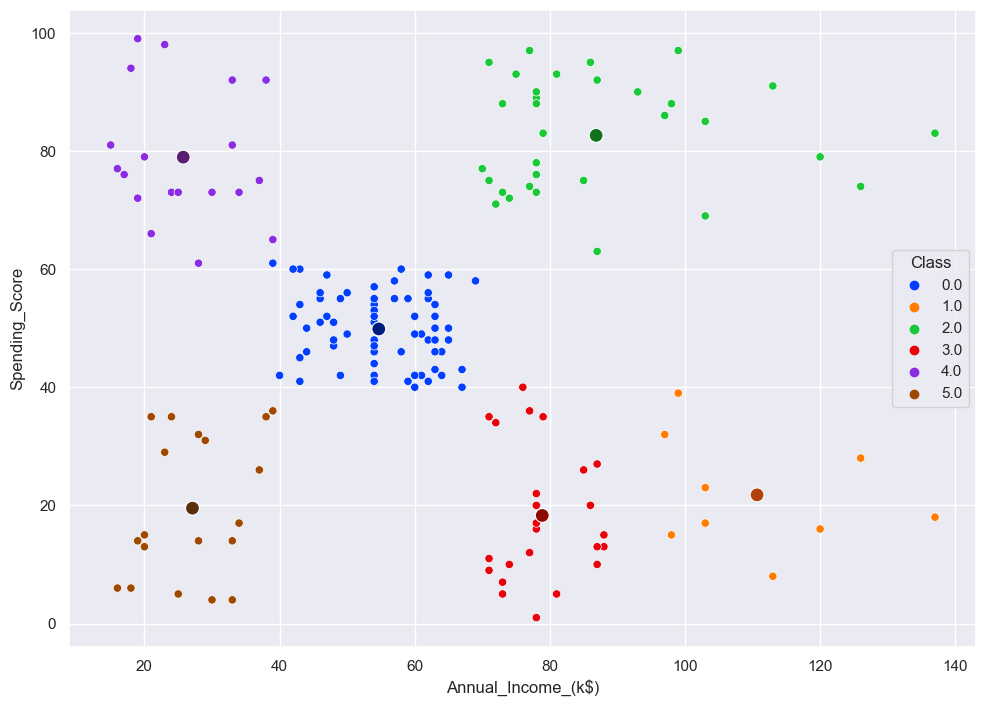

(array([[ 54.68181818,  49.86363636],
        [110.66666667,  21.77777778],
        [ 86.84848485,  82.63636364],
        [ 78.875     ,  18.29166667],
        [ 25.73684211,  78.94736842],
        [ 27.10526316,  19.52631579]]),
 array([list([1, 2, 3, 4, 5, 10, 11, 13, 16, 18, 20, 24, 26, 30, 32, 36, 37, 40, 42, 47, 48, 49, 50, 52, 53, 55, 57, 61, 63, 64, 68, 71, 73, 74, 75, 79, 80, 82, 85, 86, 90, 91, 93, 95, 97, 99, 106, 110, 113, 117, 120, 123, 125, 127, 129, 134, 136, 137, 141, 146, 155, 156, 157, 160, 163, 169]),
        list([39, 56, 103, 107, 115, 140, 145, 150, 168]),
        list([0, 8, 12, 14, 21, 23, 27, 28, 34, 38, 45, 51, 88, 92, 96, 98, 104, 105, 111, 112, 114, 116, 124, 126, 128, 133, 138, 151, 152, 158, 161, 162, 166]),
        list([6, 17, 22, 41, 46, 59, 62, 65, 66, 69, 70, 76, 77, 78, 101, 108, 122, 131, 135, 143, 144, 147, 148, 153]),
        list([7, 9, 15, 25, 60, 67, 81, 87, 94, 102, 109, 118, 121, 142, 149, 159, 164, 165, 167]),
        list([19, 29, 31, 33, 35

In [14]:
clf.predict(Customer_data_arr, plot = True)

### 3) Find the optimal value of k

#### a)

In [54]:
from scipy.spatial.distance import cdist

# k means determine k
distortions = []
K = range(1,16)
for k in K:
    #kmeanModel = KMeans(n_clusters=k).fit(X)
    #kmeanModel.fit(X)
    Sdd_opt = Kmeans(k, Customer_data.values)
    Centroids, Clusters = Sdd_opt.predict(Customer_data.values)
    distortions.append(sum(np.min(cdist(Customer_data.values, Centroids, 'euclidean'), axis=1)) / X.shape[0])

/var/folders/g2/pf8chq_93fv3k45nyqlc096r0000gn/T/ipykernel_43553/70118912.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(clusters)


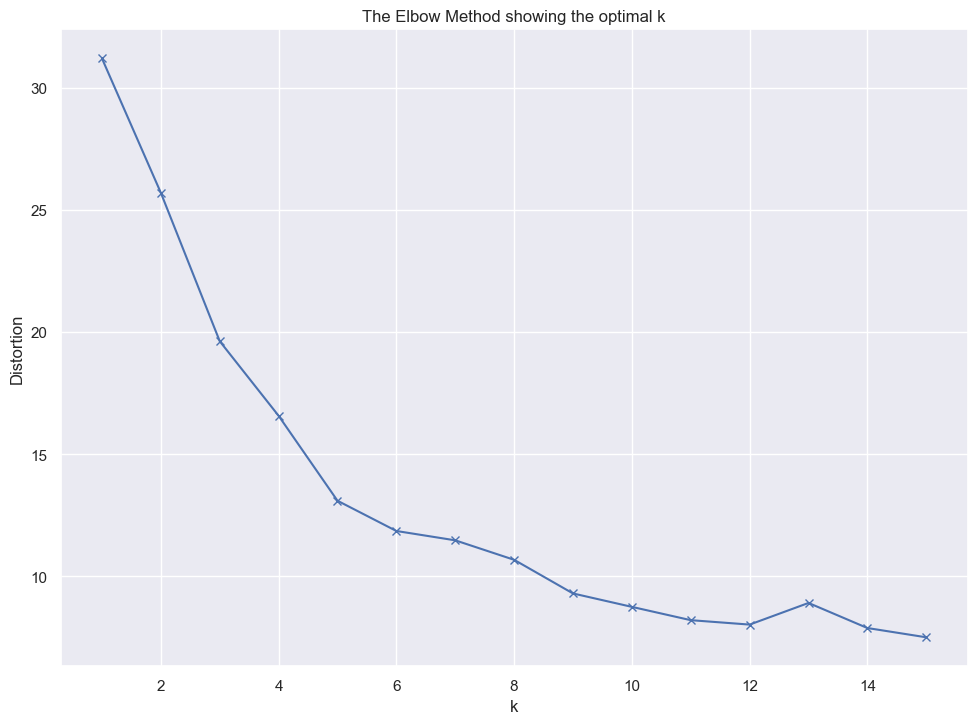

In [55]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [56]:
def plot_decision_boundaries_works2(clf, X, y, axis1=0,axis2=1, space=0.02, threshold=0.1):
    '''
    Parameters
    ----------
    clf is a pre-trained model
        it is supposed to have the predict function implemented
    
    Returns
    -------
    : None,
        Plots the decision boundaries of a pre-trained model.
        Example of usage : plot_decision_boundaries(knn1, X, y, axis1=0, axis2=1) if your pre-trained model
            is called knn1, your dataset is called X (only features), target is called y, and you want to focus
            only on axis 1 and axis 2
    '''
    x_min,  x_max  =  X[:,  axis1].min()-threshold,  X[:,  axis1].max()+threshold
    y_min,  y_max  =  X[:,  axis2].min()-threshold,  X[:,  axis2].max()+threshold
    xx,  yy  =  np.meshgrid(np.arange(x_min,  x_max,  space), np.arange(y_min,  y_max,  space))
    Y  =  np.array(clf.predict(np.c_[xx.ravel(),  yy.ravel()]))
    Y  =  Y.reshape(xx.shape)
    
    
    colors_2 = ('#FFFB00', '#C7C7C7', '#00AEFF', '#2EFF00', '#FF0000', '#E000FF' , '#FFA600')
    # Create the colormap
    cm2 = ListedColormap(colors_2[0:1+len(np.unique(y))])
    colors_3 = [colors_2[i] for i in range(len(np.unique(y))-1)]
    colors_3.append(colors_2[len(np.unique(y))])
    cm3 = ListedColormap(colors_3)
    plt.figure(figsize=(15,10))
    contour = plt.contour(xx, yy, Y)
    plt.contourf(xx,  yy,  Y,  alpha=0.8, cmap=cm2)# cmap=plt.cm.RdYlBu)

    for i in np.unique(y):
        mask = y == i
        plt.scatter(X[:, axis1][mask], X[:, axis2][mask], c=cm3(i), label=i, edgecolors='k', alpha=0.8)
 
    plt.xlabel('Axis : {}'.format(axis1))
    plt.ylabel('Axis : {}'.format(axis2))
 
    plt.legend()
    plt.xlim(xx.min()-1,  xx.max()+1)
    plt.ylim(yy.min()-1,  yy.max()+1)
    plt.title("Decision boundaries")
    plt.show()


#### b) Train a k-means model with the best value of k obtained before :

/var/folders/g2/pf8chq_93fv3k45nyqlc096r0000gn/T/ipykernel_43553/70118912.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(clusters)


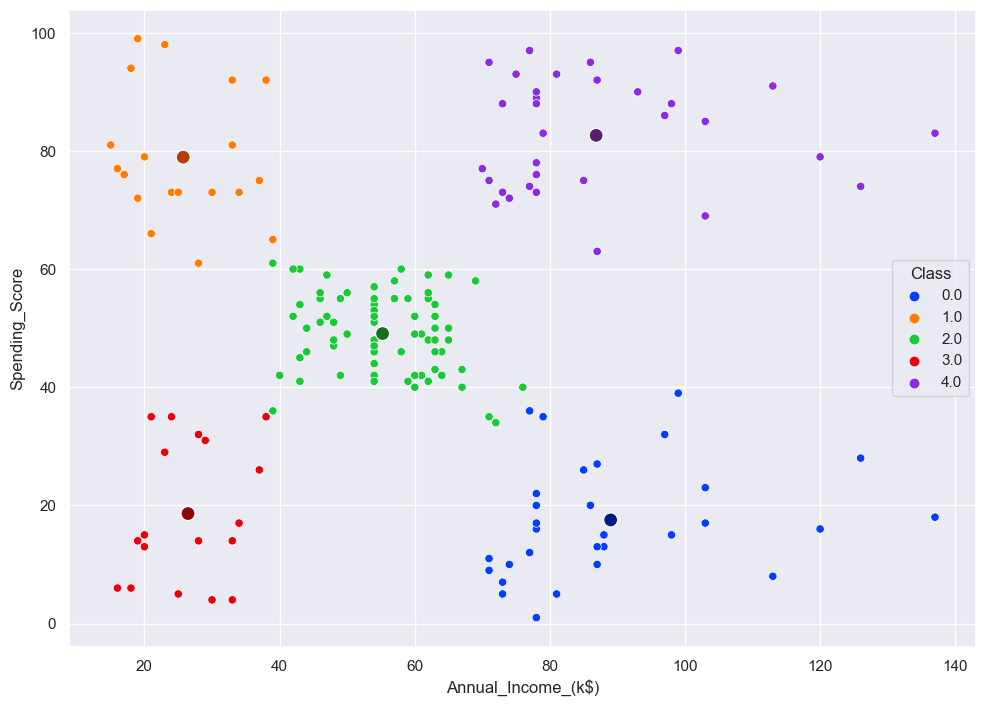

(array([[89.        , 17.53333333],
        [25.73684211, 78.94736842],
        [55.24285714, 49.08571429],
        [26.44444444, 18.61111111],
        [86.84848485, 82.63636364]]),
 array([list([6, 17, 22, 39, 41, 46, 56, 59, 62, 65, 66, 69, 70, 76, 77, 78, 101, 103, 107, 108, 115, 135, 140, 144, 145, 147, 148, 150, 153, 168]),
        list([7, 9, 15, 25, 60, 67, 81, 87, 94, 102, 109, 118, 121, 142, 149, 159, 164, 165, 167]),
        list([1, 2, 3, 4, 5, 10, 11, 13, 16, 18, 20, 24, 26, 30, 32, 35, 36, 37, 40, 42, 47, 48, 49, 50, 52, 53, 55, 57, 61, 63, 64, 68, 71, 73, 74, 75, 79, 80, 82, 85, 86, 90, 91, 93, 95, 97, 99, 106, 110, 113, 117, 120, 122, 123, 125, 127, 129, 131, 134, 136, 137, 141, 143, 146, 155, 156, 157, 160, 163, 169]),
        list([19, 29, 31, 33, 43, 44, 54, 58, 72, 83, 84, 89, 100, 119, 130, 132, 139, 154]),
        list([0, 8, 12, 14, 21, 23, 27, 28, 34, 38, 45, 51, 88, 92, 96, 98, 104, 105, 111, 112, 114, 116, 124, 126, 128, 133, 138, 151, 152, 158, 161, 162, 166])

In [40]:
clf_5 = Kmeans(5, Customer_data)
clf_5.predict(Customer_data_arr, plot = True)

### 5) More

In [41]:
KMEANS = KMeans(n_clusters=5, n_init=1, init='k-means++').fit(Customer_data_arr)

In [42]:
data1 = pd.read_csv('Customers_practice_test.csv')

In [43]:
data_arr1 = data1.values


In [44]:
pred = KMEANS.predict(data_arr1)

In [45]:
print(KMEANS.labels_)

[4 0 0 0 0 0 1 3 2 3 0 0 2 0 2 3 0 1 0 0 0 2 1 4 0 3 0 2 2 0 0 0 0 0 2 0 0
 0 2 1 0 1 0 0 0 4 1 0 0 0 0 2 0 0 0 0 1 0 0 1 3 0 1 0 0 1 1 3 0 1 1 0 0 0
 0 0 1 1 1 0 0 3 0 0 0 0 0 3 4 0 2 0 2 0 3 0 2 0 4 0 0 1 3 1 2 2 0 1 1 3 0
 2 2 0 2 1 4 0 3 0 0 3 1 0 2 0 2 0 2 0 0 1 0 4 0 1 0 0 2 0 1 0 3 1 1 1 0 1
 1 3 1 4 2 1 0 0 0 0 2 3 0 4 2 0 3 3 2 3 1 0]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

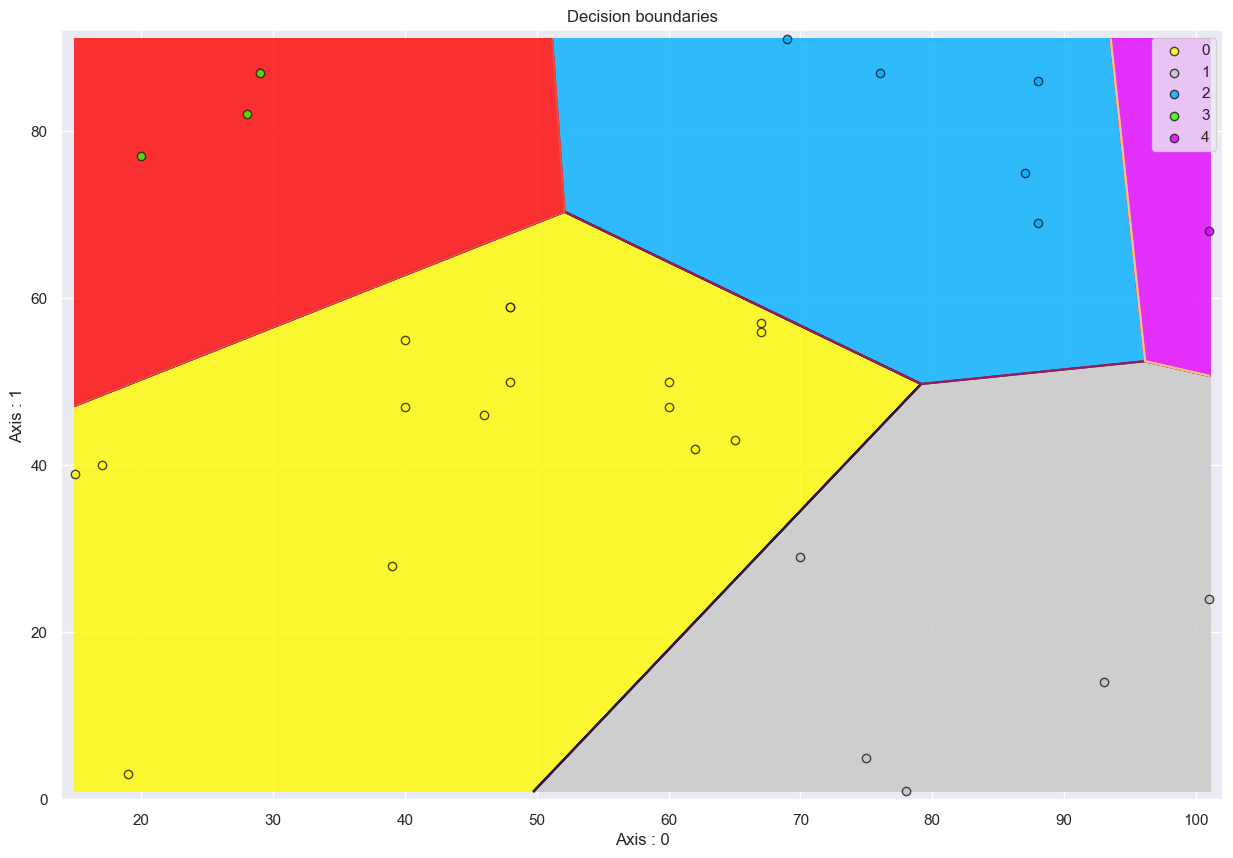

In [46]:
plot_decision_boundaries_works2(KMEANS, data_arr1[:,0:2], pred)